# Clustering and Principal Component Analysis (PCA) 
### *~1.4M Asteroids from the JPL Small Body Database* 


In [1]:
import heat as ht

Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
Authorization required, but no authorization protocol specified
/home/hopp_fa/heat/heat/core/_config.py:51: UserWarning: Heat has CUDA GPU-support (PyTorch version 2.5.1+cu124 and `torch.cuda.is_available() = True`), but CUDA-awareness of MPI could not be detected. This may lead to performance degradation as direct MPI-communication between GPUs is not possible.
  warnings.warn(


## Load the data from `hdf5`

In [68]:
x = ht.load("/projects/HPDAGrundlagensoftware-Heat/Testdata/JPL_SBDB/jplsbdb_asteroids.h5", "properties", device="gpu", split=0)
x

DNDarray([[7.9600e-02, 2.7660e+00, 2.5460e+00,  ..., 2.4616e+06, 1.6800e+03, 4.6000e+00],
          [2.3060e-01, 2.7700e+00, 2.1310e+00,  ..., 2.4617e+06, 1.6800e+03, 4.6100e+00],
          [2.5580e-01, 2.6710e+00, 1.9880e+00,  ..., 2.4616e+06, 1.5900e+03, 4.3700e+00],
          ...,
          [6.6170e-01, 2.8210e+00, 9.5400e-01,  ..., 2.4613e+06, 1.7300e+03, 4.7400e+00],
          [1.2970e-01, 2.3590e+00, 2.0530e+00,  ..., 2.4611e+06, 1.3200e+03, 3.6200e+00],
          [1.4920e-01, 2.7170e+00, 2.3120e+00,  ..., 2.4604e+06, 1.6400e+03, 4.4800e+00]], dtype=ht.float32, device=gpu:0, split=0)

## Get an overview: basic statistics 

In [69]:
m = ht.mean(x,axis=0)
s = ht.std(x,axis=0)
med = ht.median(x,axis=0)
minimum = ht.min(x,axis=0)
maximum = ht.max(x,axis=0)
print(m)
print(med)
print(s)
print(minimum)
print(maximum)

DNDarray([1.5923e-01, 2.9360e+00, 2.4086e+00, 9.3504e+00, 1.6969e+02, 1.8172e+02, 1.7802e+02, 3.4634e+00, 2.3533e-01,
          2.4608e+06, 3.5063e+03, 9.6029e+00], dtype=ht.float32, device=gpu:0, split=None)
DNDarray([1.4790e-01, 2.6660e+00, 2.2400e+00, 7.9400e+00, 1.6142e+02, 1.8342e+02, 1.7623e+02, 3.0800e+00, 2.2650e-01,
          2.4610e+06, 1.5900e+03, 4.3500e+00], dtype=ht.float32, device=gpu:0, split=None)
DNDarray([9.4807e-02, 1.9860e+01, 2.1889e+00, 6.6693e+00, 1.0292e+02, 1.0378e+02, 1.0580e+02, 3.9399e+01, 8.4042e-02,
          1.6512e+03, 8.7765e+05, 2.4062e+03], dtype=ht.float32, device=gpu:0, split=None)
DNDarray([0.0000e+00, 4.6180e-01, 6.9000e-02, 1.0000e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.5000e-01, 4.2730e-07,
          2.3215e+06, 1.1500e+02, 3.1400e-01], dtype=ht.float32, device=gpu:0, split=None)
DNDarray([9.9960e-01, 1.7460e+04, 8.0637e+01, 1.7598e+02, 3.6000e+02, 3.6000e+02, 3.7000e+02, 3.4859e+04, 3.1410e+00,
          2.6715e+06, 8.4200e+08, 2.3100e+06],

## Scaling the data 

In [70]:
from heat.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)
scaler.fit_transform(x)
print(x)
print(x.mean(axis=0))
print(x.std(axis=0))

DNDarray([[-8.3988e-01, -8.5580e-03,  6.2784e-02,  ...,  4.6074e-01, -2.0809e-03, -2.0792e-03],
          [ 7.5283e-01, -8.3566e-03, -1.2681e-01,  ...,  5.1827e-01, -2.0809e-03, -2.0750e-03],
          [ 1.0186e+00, -1.3341e-02, -1.9214e-01,  ...,  4.7966e-01, -2.1834e-03, -2.1748e-03],
          ...,
          [ 5.3000e+00, -5.7887e-03, -6.6451e-01,  ...,  2.8238e-01, -2.0239e-03, -2.0210e-03],
          [-3.1144e-01, -2.9051e-02, -1.6244e-01,  ...,  1.6186e-01, -2.4911e-03, -2.4865e-03],
          [-1.0576e-01, -1.1025e-02, -4.4118e-02,  ..., -2.4286e-01, -2.1264e-03, -2.1291e-03]], dtype=ht.float32, device=gpu:0, split=0)
DNDarray([ 1.3464e-07, -6.8981e-09,  1.5184e-07,  4.1721e-08,  1.3464e-07,  1.6092e-07,  2.2652e-07,  4.6749e-09,
           1.6015e-07,  1.7285e-06, -1.0389e-10,  3.1166e-10], dtype=ht.float32, device=gpu:0, split=None)
DNDarray([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000], dtype=ht.float32, device=gpu:0, split=N

## Clustering with K-Means 

In [71]:
from heat.cluster import KMeans
kmeans = KMeans(n_clusters=5, init="batchparallel")
kmeans.fit(x)
print(kmeans.labels_)

DNDarray([[2],
          [0],
          [0],
          ...,
          [3],
          [2],
          [0]], dtype=ht.int64, device=gpu:0, split=0)


## Vizualization with PCA 

In [72]:
from heat.decomposition import PCA 
pca = PCA(svd_solver="full")
pca.fit(x)
print(pca.singular_values_)

DNDarray([2.4105e+03, 1.4566e+03, 1.3290e+03, 1.3022e+03, 1.2496e+03, 1.1295e+03, 1.1131e+03, 1.0657e+03, 9.7940e+02,
          2.4479e+02, 7.0855e-01, 8.1843e-02], dtype=ht.float32, device=gpu:0, split=None)


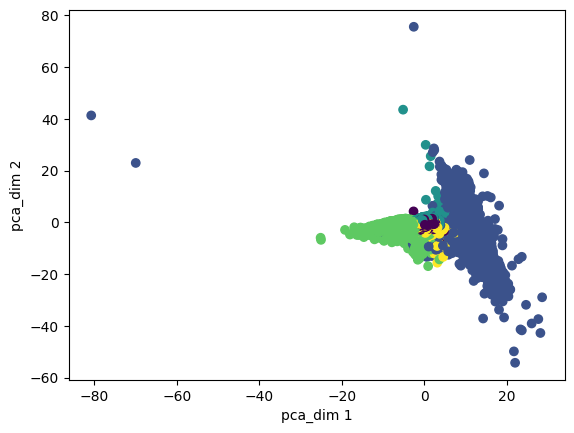

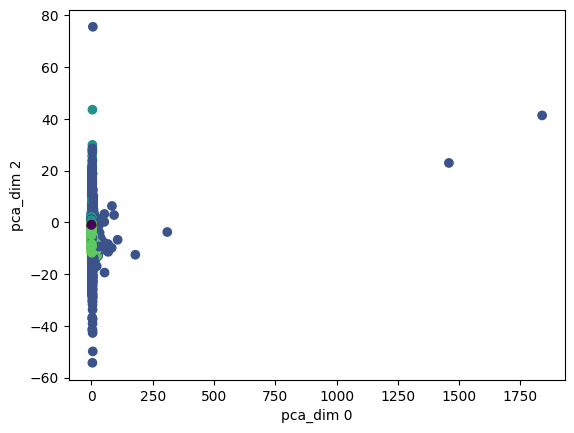

In [73]:
import matplotlib.pyplot as plt 

dim_list = [(1,2), (0,2)]
labels = kmeans.labels_.numpy()
for dims in dim_list: 
    y = pca.transform(x)
    first_feature = y[:,dims[0]].numpy()
    second_feature = y[:,dims[1]].numpy()
    plt.figure()
    plt.scatter(first_feature, second_feature, c=labels)
    plt.xlabel(f'pca_dim {dims[0]}')
    plt.ylabel(f'pca_dim {dims[1]}')
    plt.show()